# 0. Intro
It's not unusual to see a kangaroo next to a human down in the down under.  However, it's unusual to see a giraffe next to a human down in the down under.  Being similar in certain aspects : long necks, tall structures, strong, and similar looking facial features, at a glance it may be easy to confuse a kangaroo with a giraffe. 

We don't want to see Aussies domesticate giraffes rather than kangaroos.

So lets use machine learning and technology to help us distinguish between a kangaroo and a giraffe.  In this project, we'll walk through the steps to build a deep convulutional neural network (CNN) image classifier model, using python and some external libraries such as tensorflow.



# 1. Install Dependencies and Setup

Firstly, we need to install the necessary dependencies for our project.  These dependencies will make building the model very easy.

- TensorFlow: a popular deep learning framework, because it provides the necessary tools and functions for building and training deep convolutional neural networks (CNNs) for image classification tasks.

- TensorFlow-GPU: an optimized version of TensorFlow for GPU acceleration, as it leverages the power of GPUs to significantly speed up the training process of our CNN model.

- OpenCV-Python: a computer vision library, to handle image processing tasks, such as loading and manipulating images, which are essential for preparing our image dataset for training our CNN model.

- Matplotlib: a plotting library so we can visualize our data and results.  It enables us to create informative and insightful visualizations of our image classification model's performance and predictions.

Lets do it : 



In [49]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/km/1fb7v2mx6g7f9458glpn08740000gn/T/pip-install-qlonz51k/tensorflow-gpu_9bf4fcd354994ac286f5614ccbb1ef31/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      


Great, now lets import them to use them in our project :

In [50]:
import tensorflow as tf
import os

To avoid Out of Memory (OOM) errors, we include the following lines of code:

In [51]:
# Avoid OOM errors 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 3. Load Data
In this section, we're preparing our neural network to understand and work with our images of kangaroos and giraffes.  We first need to load the data so the neural network knows which data to work with.  In this case, it would be the kangaroo and the giraffe images

Let's start by importing numpy and pyplot from matplotlib. numpy helps us handle large arrays of image data efficiently, which is vital since our images are represented as arrays of pixel values. pyplot enables us to visualize the images and ensure they're loaded correctly.

In [52]:
import numpy as np
from matplotlib import pyplot as plt

 Next, we use TensorFlow's image_dataset_from_directory function to load our images of kangaroos and giraffes from their respective directories. This function simplifies the process of reading images from the disk, categorizing them based on their folder structure, and preparing them for processing by our neural network.

In [53]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1262 files belonging to 2 classes.


 Finally, we create a data_iterator using the as_numpy_iterator method. This iterator allows us to loop through the dataset in a way that's efficient and easy to use. It converts the dataset into a format that our neural network can work with.

In [54]:
data_iterator = data.as_numpy_iterator()

In [55]:
batch = data_iterator.next()

Great, let's verify to make sure that the data has been loaded : 

We loop through the first four images of a batch (assuming batch[0] contains image data and batch[1] contains labels) and display each image in its respective subplot.

Each image is converted from its original data type to an integer type for display (img.astype(int)), which is necessary because matplotlib expects pixel values to be integers when displaying images.

The title of each subplot is set to the corresponding label from batch[1], which indicates whether the image is of a kangaroo or a giraffe.

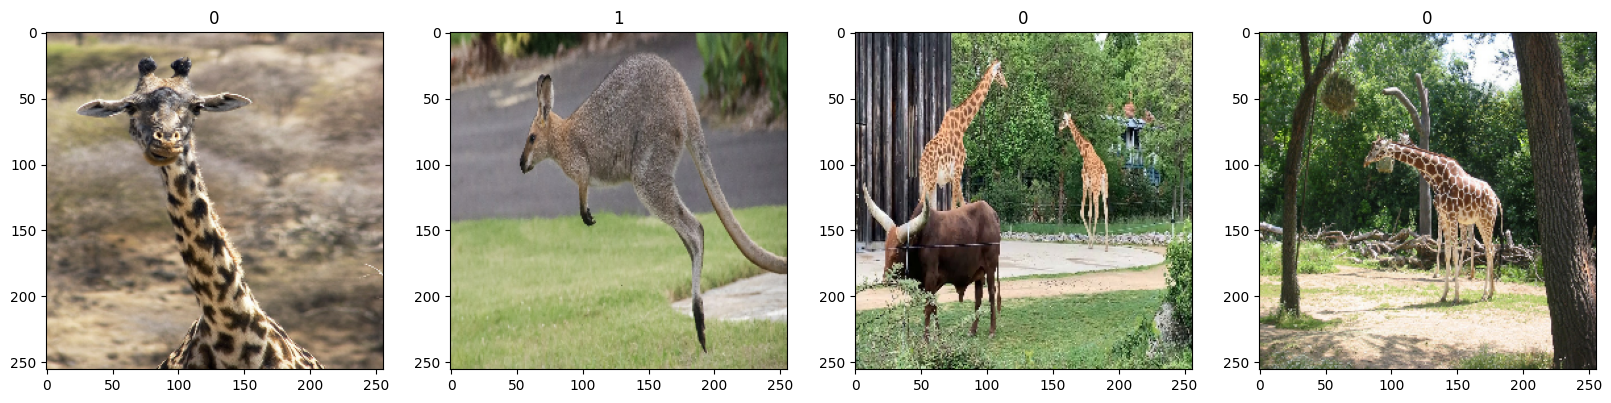

In [56]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data
After all the data has been loadng, let's scale the data.  

Scaling the data is a crucial preprocessing step, it converts the pixel values from a range of 0-255 to a range of 0-1.

Neural networks typically perform better when the input data ranges between 0 and 1. This uniform range can help to speed up the learning process because it ensures that the gradient descent step isn't disproportionately influenced by the raw scale of the input features.

In [57]:
data = data.map(lambda x,y: (x/255, y))

Making sure that all the values are between 0 and 1 : 

In [58]:
data.as_numpy_iterator().next()

(array([[[[0.4054994 , 0.42314646, 0.44765624],
          [0.26746324, 0.26746324, 0.29883578],
          [0.27412683, 0.27020526, 0.29373467],
          ...,
          [0.6537071 , 0.77037376, 0.6399816 ],
          [0.6261029 , 0.7555147 , 0.57120097],
          [0.56473655, 0.66930145, 0.49692094]],
 
         [[0.38762254, 0.4052696 , 0.4297794 ],
          [0.26879597, 0.26879597, 0.3001685 ],
          [0.29131433, 0.28739277, 0.31092218],
          ...,
          [0.80700064, 0.92366725, 0.7932751 ],
          [0.6085631 , 0.73147976, 0.56413907],
          [0.5757659 , 0.6884804 , 0.506633  ]],
 
         [[0.38053003, 0.3981771 , 0.42268687],
          [0.25102636, 0.25102636, 0.2823989 ],
          [0.296875  , 0.29295343, 0.31648284],
          ...,
          [0.5842678 , 0.6979933 , 0.57642466],
          [0.72265625, 0.829519  , 0.68745404],
          [0.52288604, 0.6532782 , 0.4660233 ]],
 
         ...,
 
         [[0.25497857, 0.30044425, 0.23037684],
          [0.48255

# 5. Split Data
Now, let's spllit the dataset into traning, testing, and validation sets.  

This is a crucial step in preparing the data for the model training process because it helps to evaluate the model's performance on unseen data and reduces the risk of overfitting.

- The training set is used to train the model
- the validation set is used to fine-tune the model parameters and prevent overfitting
- The testing set is used to evaluate the model's final performance.

Let's first calculate the sizes for each subset. We are allocating 70% of the data for training, 20% for validation, and 10% for testing. 

In [59]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [60]:
train_size

28

Next, let's create the actual subsets using the sizes calculated above.

In [61]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

With splitting the data finished, let's go ahead and build the deep learning model

# 6. Build Deep Learning Model

Let's start by creating the Convolutional Neural Network (CNN) that will learn to distinguish between images of kangaroos and giraffes.

In [62]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

First up, we import the necessary building blocks for our neural network from Keras. 

These include layers like Conv2D for convolutional operations, MaxPooling2D for downscaling our features, Flatten for converting the 2D features into a 1D vector, and Dense for our fully connected layers.

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Next, let's assemble our model. We use the Sequential model from Keras, which allows us to stack layers like building blocks, with each layer feeding into the next.

In [64]:
model = Sequential()

Now let's add the layers : 
- Convolutional Layers (Conv2D): These are the bread and butter of our network, designed to extract features from our images. We set them up with filters of varying sizes, and we use the ReLU activation function to introduce non-linearity.
- Pooling Layers (MaxPooling2D): After each convolutional layer, we add a pooling layer to reduce the spatial dimensions of the output and to help with making the detection of features more robust.
- Flattening Layer (Flatten): Once we've filtered and pooled our way through the image data, we flatten the output to prepare it for the final classification step.
- Dense Layers: Finally, we add fully connected layers that use the extracted features to determine the class of the image. The last dense layer uses the sigmoid activation function since we're dealing with a binary classification problem—kangaroo or giraffe.

In [65]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

After the model is built, we compile it with an optimizer and loss function that are suitable for binary classification tasks. Here, we're using the 'adam' optimizer and 'BinaryCrossentropy' as our loss function. We also specify that we want to track 'accuracy' during training.

In [66]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Finally, let's take a look at an overview of the network's structure

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

Now that we have our CNN neural network, we can start the traning process.  

This is the stage where the model learns to classify images into kangaroos and giraffes!

First, we set up a directory to store logs. These logs will be useful for visualization and analysis later on.

In [68]:
logdir='logs'

Next, we prepare a callback for TensorBoard, which is a tool that provides visualization and tooling for machine learning experimentation:

In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Finally, we start training the model. We specify the training data, the number of epochs (which is how many times the model will see the entire dataset), the validation data, and the TensorBoard callback we just set up. This callback will log events like model loss and accuracy, which are crucial for monitoring the training process.

In [70]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


28/28 [==============================] - 11s 346ms/step - loss: 0.7725 - accuracy: 0.7042 - val_loss: 0.5149 - val_accuracy: 0.7539
Epoch 2/20
28/28 [==============================] - 13s 428ms/step - loss: 0.4674 - accuracy: 0.7723 - val_loss: 0.4670 - val_accuracy: 0.7617
Epoch 3/20
28/28 [==============================] - 14s 461ms/step - loss: 0.3736 - accuracy: 0.8203 - val_loss: 0.3314 - val_accuracy: 0.8203
Epoch 4/20
28/28 [==============================] - 13s 429ms/step - loss: 0.3605 - accuracy: 0.8549 - val_loss: 0.2828 - val_accuracy: 0.8945
Epoch 5/20
28/28 [==============================] - 12s 395ms/step - loss: 0.2734 - accuracy: 0.8862 - val_loss: 0.2190 - val_accuracy: 0.9102
Epoch 6/20
28/28 [==============================] - 11s 370ms/step - loss: 0.2256 - accuracy: 0.9118 - val_loss: 0.2125 - val_accuracy: 0.9219
Epoch 7/20
28/28 [==============================] - 12s 388ms/step - loss: 0.1692 - accuracy: 0.9353 - val_loss: 0.2046 - val_accuracy: 0.9141
Epoch 8/20

Let's view the outputs of the training results through graphs : 

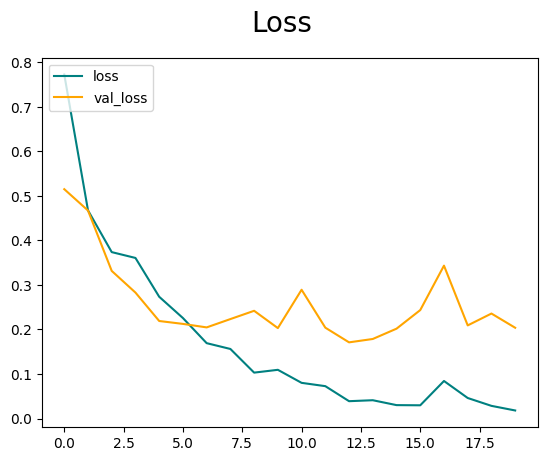

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()  

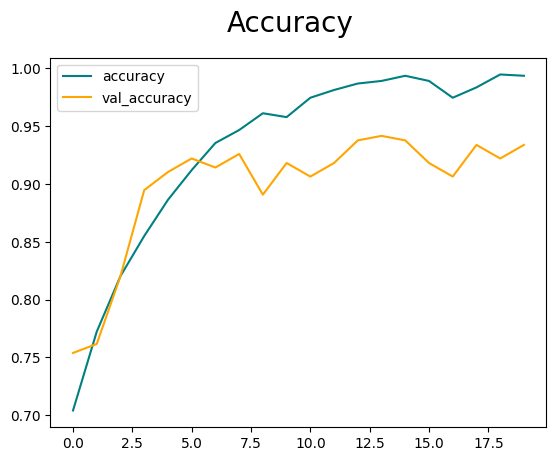

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

As you can see, The model's training accuracy improved to nearly 99%, indicating a strong learning capability, while the validation accuracy peaked at 93%, suggesting good generalization but with signs of possible overfitting.  However, the loss decreased to nearly 0.1, which is a good sign.

But the only true way to see if this model is good enough to recgonise between a kangaroo and a giraffe is to put it to the real test : evaluating it with real images!





# 9. Evaluate

It's time to put our model to the test, measuring how well it performs on data it has never seen before. This is where we determine the model's precision and reliability in making predictions.

We start by importing the necessary metrics from TensorFlow to evaluate our model. 

- Precision will tell us the accuracy of the positive predictions
- Recall will measure the model's ability to find all the relevant cases within the data
- BinaryAccuracy provides a straightforward accuracy percentage of the model's predictions.

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

Next, we initialize these metrics to prepare for the evaluation process. This setup allows us to update these metrics with actual data and predicted outcomes, so we can get real results.

In [74]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In this loop, we go through each batch of our test data, make predictions using our trained model, and compare those predictions against the actual labels to update our metrics. This iterative approach gives us an ongoing tally of our model's performance.



In [75]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 56ms/step


Finally, we print out the calculated values for Precision, Recall, and Accuracy. 






In [76]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.90909094, shape=(), dtype=float32) tf.Tensor(0.7692308, shape=(), dtype=float32) tf.Tensor(0.92727274, shape=(), dtype=float32)


The model has a high precision at ~91%, which means that most of the time it can predict the correct animal correctly.  Let's try it out now!

# 10. Test

In [77]:
import cv2

Show the image first : let's see if the model can identify it as a kangaroo later

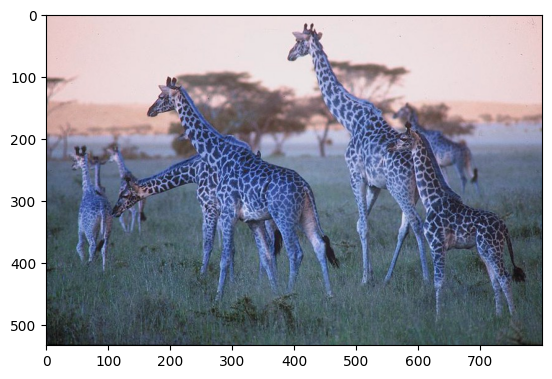

In [88]:
img = cv2.imread('sample-giraffe.jpg')
plt.imshow(img)
plt.show()

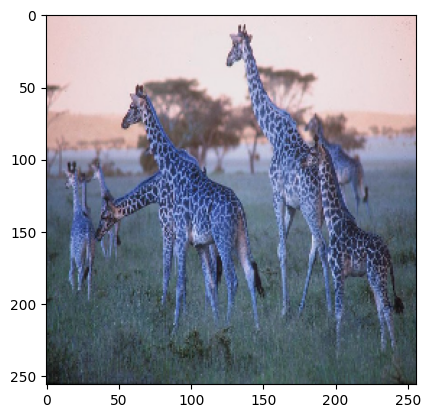

In [89]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 17ms/step


In [91]:
yhat

array([[4.693294e-08]], dtype=float32)

In [92]:
if yhat > 0.5: 
    print(f'Kangaroo')
else:
    print(f'Giraffe')

Giraffe


Yay, the model can tell between a Kangaroo and a Giraffe!